In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Date (Дата)        
Описание: Дата в формате dd/mm/yyyy.**

**Time (Время)        
Описание: Время в формате hh:mm:ss.**

**Global Active Power (Глобальная активная мощность)        
Описание: Среднеминутная активная мощность дома (в киловаттах).**

**Global Reactive Power (Глобальная реактивная мощность)        
Описание: Среднеминутная реактивная мощность дома (в киловаттах).**

**Voltage (Напряжение)        
Описание: Среднеминутное напряжение (в вольтах).**

**Global Intensity (Глобальная интенсивность)        
Описание: Среднеминутная интенсивность тока в доме (в амперах).**

**Sub Metering 1 (Энергопотребление субсчетчика 1)        
Описание: Потребление активной энергии субсчетчика № 1 (в ватт-часах). Соответствует кухне, включающей в себя посудомоечную машину, духовку и микроволновую печь.**

**Sub Metering 2 (Энергопотребление субсчетчика 2)        
Описание: Потребление активной энергии субсчетчика № 2 (в ватт-часах). Соответствует прачечной, содержащей стиральную машину, сушильную машину, холодильник и освещение.**

**Sub Metering 3 (Энергопотребление субсчетчика 3)        
Описание: Потребление активной энергии субсчетчика № 3 (в ватт-часах). Соответствует электрическому водонагревателю и кондиционеру.**

In [5]:
data = pd.read_csv('household_power_consumption.txt', delimiter=';',na_values='?', dtype={'Global_active_power': float, 'Global_reactive_power': float, 'Voltage': float, 'Global_intensity': float, 'Sub_metering_1': float, 'Sub_metering_2': float, 'Sub_metering_3': float})
data['dt'] = data['Date'] + ' ' + data['Time']
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,dt
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16/12/2006 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,26/11/2010 20:58:00
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,26/11/2010 20:59:00
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,26/11/2010 21:00:00
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,26/11/2010 21:01:00


In [6]:
data.drop(['Date', 'Time'], axis=1, inplace=True)
data['dt'] = pd.to_datetime(data['dt'], dayfirst=True) 
data.set_index(data['dt'], inplace=True)
data.drop('dt', axis=1, inplace=True)

In [8]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


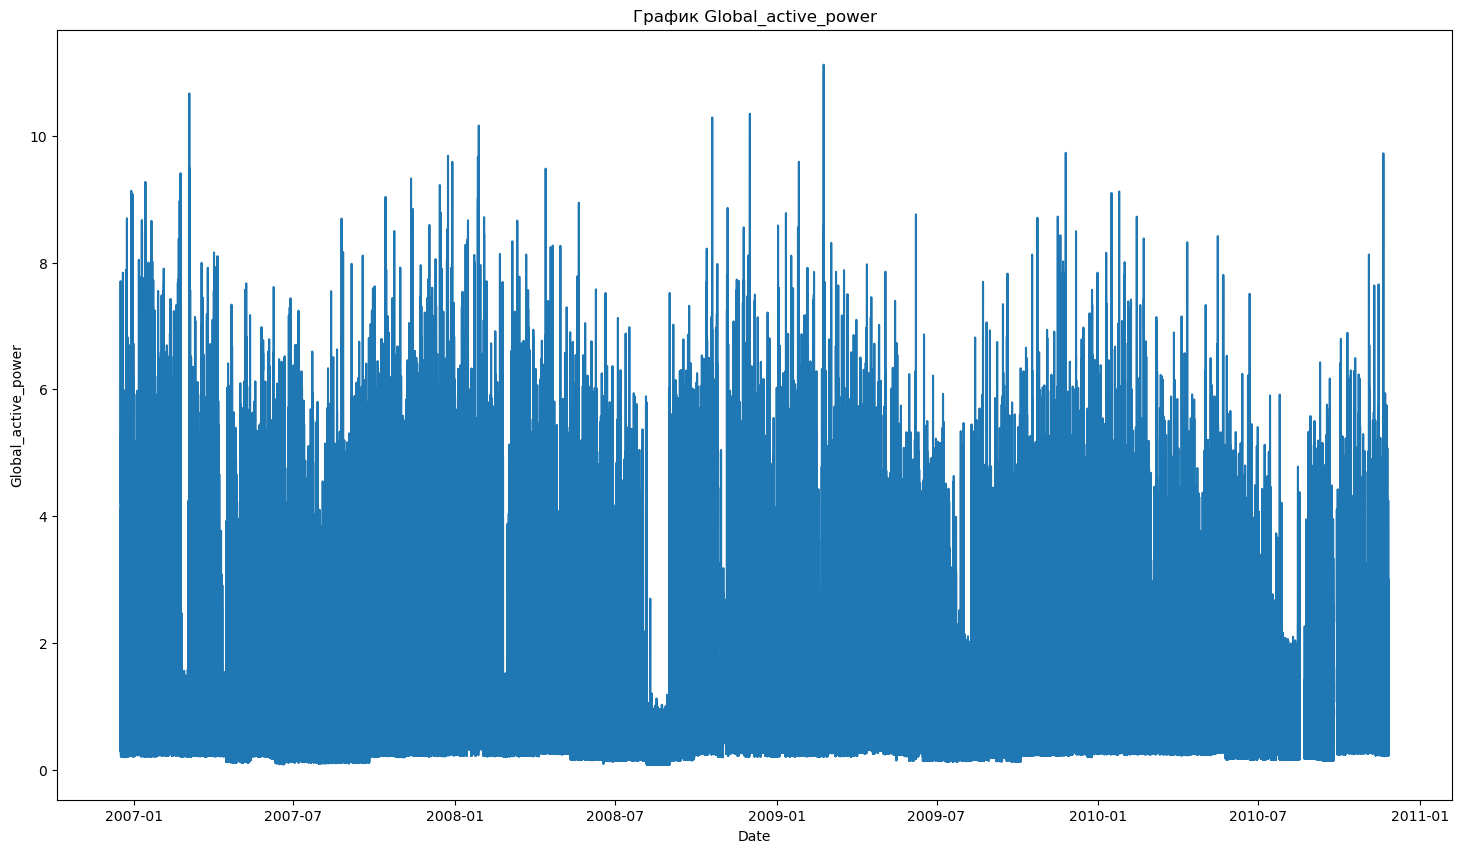

In [26]:
plt.figure(figsize=(18, 10))
plt.plot(data['Global_active_power'])
plt.title('График Global_active_power')
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.show()

In [27]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [33]:
data.mean()

Global_active_power        1.091615
Global_reactive_power      0.123714
Voltage                  240.839858
Global_intensity           4.627759
Sub_metering_1             1.121923
Sub_metering_2             1.298520
Sub_metering_3             6.458447
dtype: float64

Text(0.5, 1.0, 'Global_active_power')

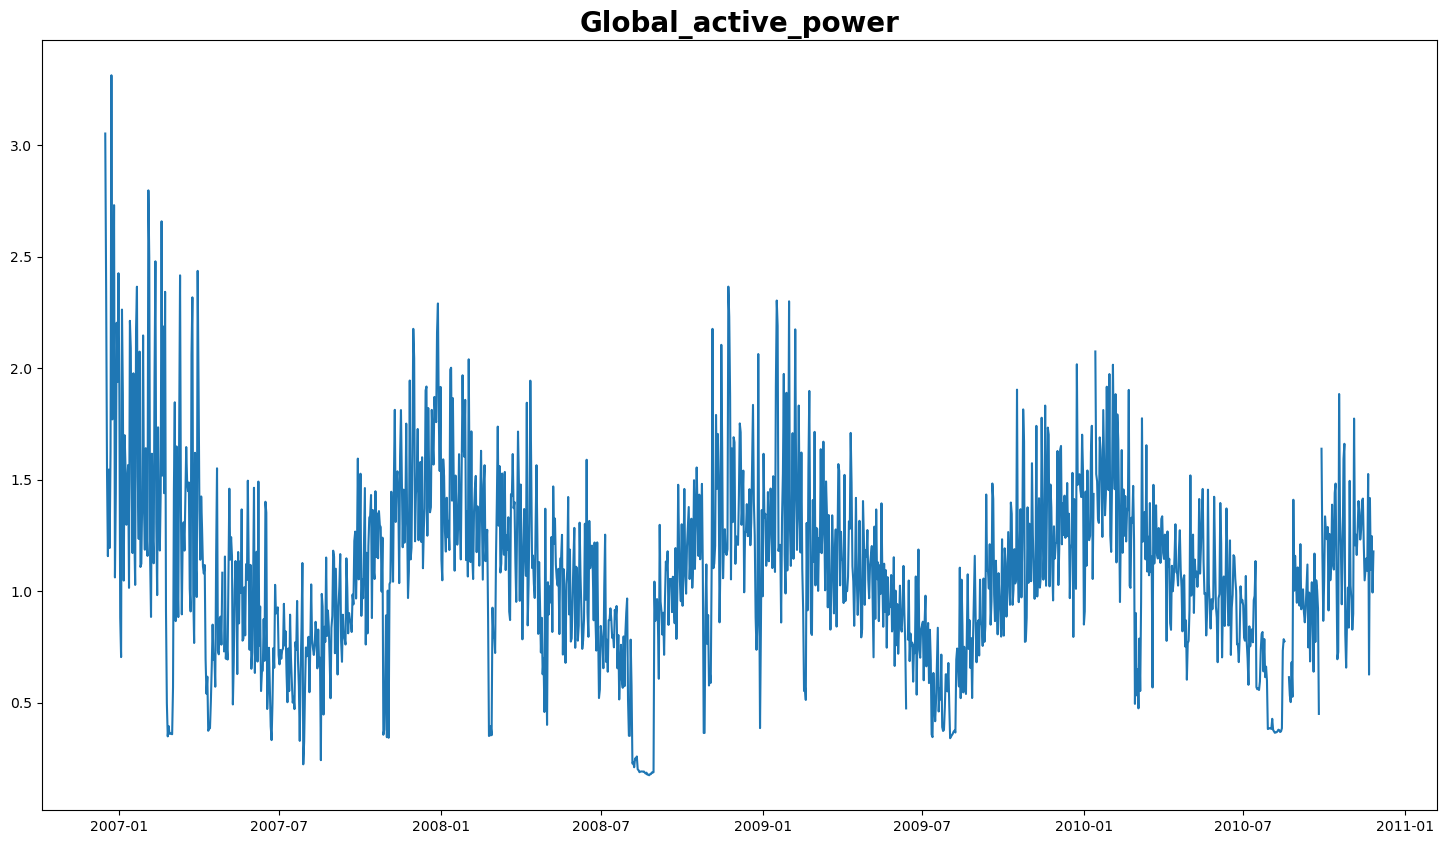

In [45]:
consumption = data.groupby(data.index.date).mean()
fig, axs = plt.subplots(figsize = (18, 10))
columns = consumption.columns
axs.plot(consumption[columns[0]])
axs.set_title(columns[0], fontweight = 'bold', size = 20)